In [ ]:
!pip install tensorflow==2.2
!pip install keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.2 MB 4.9 kB/s 
     |████████████████████████████████| 2.9 MB 14.0 MB/s 
     |████████████████████████████████| 3.0 MB 47.9 MB/s 
     |████████████████████████████████| 26.1 MB 1.2 MB/s 
     |████████████████████████████████| 454 kB 69.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Unins

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Periksa versi library TensorFlow & Keras
print("Versi TensorFlow :", tf.__version__)
print("Versi Keras      :", keras.__version__)

Versi TensorFlow : 2.2.0
Versi Keras      : 2.3.0-tf


In [ ]:
# Periksa versi library lainnya
!pip list --version

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.8
bokeh

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/Data Citra/Latihan_Skripsi/TRAIN'
test_dir = '/content/drive/MyDrive/Data Citra/Latihan_Skripsi/TEST'
validation_dir = '/content/drive/MyDrive/Data Citra/Latihan_Skripsi/VAL'

In [ ]:
categories = ['COVID-19', 'PNEUMONIA', 'TUBERCULOSIS', 'NORMAL']

In [ ]:
import random
import numpy as np
import os
import cv2

img_size_150p = 224 #ukuran yang digunakan pada data citra ini adalah 128 x 128 piksel

def create_data_img(folder_path):
  imageData = []
  for category in categories:
    path = os.path.join(folder_path, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img)) #data citra di inisialisasi
      img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) #data citra dilakukan konversi color space
      img_resize = cv2.resize(img_convert, (img_size_150p, img_size_150p)) #data citra diubah ukurannya menjadi 128x128 piksel
      imageData.append([img_resize, class_num])
  return imageData

In [ ]:
dataTrain = create_data_img(train_dir) # melakukan image processing pada data train
dataTest = create_data_img(test_dir) # melakukan image processing pada data testing
dataVal = create_data_img(validation_dir) #melakukan image processing pada data validasi
random.seed(10)
random.shuffle(dataTrain) # dilakukan shuffle pada data train agar tidak terjadi pengurutan berdasarkan label ketika proses training berlangsung

In [ ]:
X_train, y_train, X_test, y_test, X_val, y_val = [], [], [], [], [], []

for features, label in dataTrain:
  X_train.append(features)
  y_train.append(label)

for features, label in dataTest:
  X_test.append(features)
  y_test.append(label)

for features, label in dataVal:
  X_val.append(features)
  y_val.append(label)

# reshape -1, membuatkan library numpy menentukan dimensi yang sesuai
X_train = np.array(X_train).reshape(-1, img_size_150p, img_size_150p, 3)
y_train = np.asarray(y_train)
X_test = np.array(X_test).reshape(-1, img_size_150p, img_size_150p, 3)
y_test = np.asarray(y_test)
X_val = np.array(X_val).reshape(-1, img_size_150p, img_size_150p, 3)
y_val = np.asarray(y_val)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)
print("X_val   :", X_val.shape)
print("y_val   :", y_val.shape)

X_train : (206, 224, 224, 3)
y_train : (206,)
X_test  : (130, 224, 224, 3)
y_test  : (130,)
X_val   : (40, 224, 224, 3)
y_val   : (40,)


In [ ]:
print("Isi array X_train : \n\n", X_train[0])
print("\nIsi Array X_test : \n\n", X_test[0])
print("\nIsi Array X_Val : \n\n", X_val[0])

def prep_pixels(train, test, val):
  train_norm = train.astype('float32') #data dikonversi kedalam tipe data float
  test_norm = test.astype('float32')
  val_norm = val.astype('float32')

  train_norm = train_norm / 255.0 #data citra dibagi dengan 255.0 agar mendapatkan range 0-1
  test_norm = test_norm / 225.0
  val_norm = val_norm / 225.0

  return train_norm, test_norm, val_norm

X_train_norm, X_test_norm, X_val_norm = prep_pixels(X_train, X_test, X_val)

print("\nIsi Array X_train_norm :\n\n", X_train_norm[0])
print("\nIsi Array X_test_norm  :\n\n", X_test_norm[0])
print("\nIsi Array X_test_norm  :\n\n", X_val_norm[0])

Isi array X_train : 

 [[[103 103 103]
  [102 102 102]
  [100 100 100]
  ...
  [170 170 170]
  [172 172 172]
  [173 173 173]]

 [[100 100 100]
  [ 99  99  99]
  [ 97  97  97]
  ...
  [170 170 170]
  [172 172 172]
  [173 173 173]]

 [[ 94  94  94]
  [ 94  94  94]
  [ 93  93  93]
  ...
  [170 170 170]
  [173 173 173]
  [174 174 174]]

 ...

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [199 199 199]
  [199 199 199]
  [199 199 199]]

 [[  1   1   1]
  [  2   2   2]
  [  1   1   1]
  ...
  [201 201 201]
  [201 201 201]
  [201 201 201]]

 [[  3   3   3]
  [  1   1   1]
  [  0   0   0]
  ...
  [202 202 202]
  [203 203 203]
  [203 203 203]]]

Isi Array X_test : 

 [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  1   1   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  2   2   2]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[101

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

print("Isi Array y_train :", y_train)
print("Isi Array y_test  :", y_test)
print("Isi Array y_val  :", y_val)

y_train_encode = to_categorical(y_train)
y_test_encode = to_categorical(y_test)
y_val_encode = to_categorical(y_val)

print("\nIsi Array y_train_encode :\n\n", y_train_encode)
print("\nIsi Array y_test_encode :\n\n", y_test_encode)
print("\nIsi Array y_val_encode :\n\n", y_val_encode)

Isi Array y_train : [0 0 3 3 0 2 1 3 1 3 1 3 0 0 2 3 1 0 0 3 3 3 3 1 0 3 0 3 0 3 3 2 3 1 2 2 2
 0 1 3 1 1 0 0 0 1 3 0 2 0 3 3 2 3 0 2 3 3 2 0 3 0 3 0 1 2 1 3 2 3 0 2 1 1
 3 3 1 2 3 3 3 0 3 3 3 1 1 2 0 0 3 3 3 0 2 1 0 3 2 3 3 3 3 2 2 3 3 3 1 0 3
 1 3 0 2 0 1 1 3 3 2 0 3 1 1 3 2 0 0 2 0 0 3 2 2 0 0 3 0 3 3 3 0 3 2 1 0 3
 3 3 0 2 2 2 3 1 3 2 3 3 0 3 1 0 3 3 2 3 2 1 3 0 3 3 1 0 2 1 3 1 3 2 2 3 0
 2 0 2 1 0 1 3 3 3 0 3 1 2 2 1 0 3 2 2 0 3]
Isi Array y_test  : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Isi Array y_val  : [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3]

Isi Array y_train_encode :

 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0

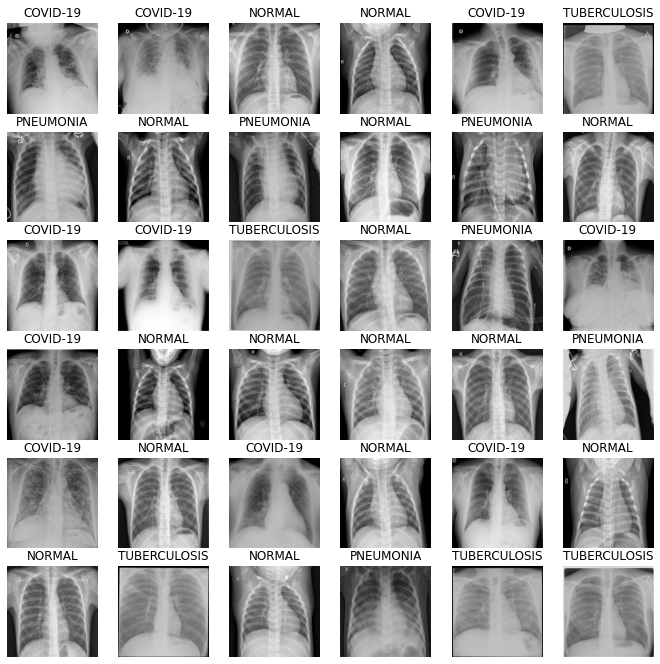

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
nrows = 6
ncols = 6
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
  for j in range(ncols):
    temp = i*ncols+j
    ax[i,j].imshow(X_train[temp])
    if y_train[temp] == 0:
      judul = "COVID-19"
    elif y_train[temp] == 1:
      judul = "PNEUMONIA"
    elif y_train[temp] == 2:
      judul = "TUBERCULOSIS"
    elif y_train[temp] == 3:
      judul = "NORMAL"
    ax[i,j].set_title(judul)
    ax[i,j].axis('off')
plt.show()

In [ ]:
import gc

del dataTrain
del dataTest
del dataVal
del X_train
del X_test
del X_val

gc.collect()

45

In [ ]:
print("X_train_norm   :", X_train_norm.shape)
print("y_train_encode :", y_train_encode.shape)
print("X_test_norm    :", X_test_norm.shape)
print("y_test_encode  :", y_test_encode.shape)
print("X_inet_norm    :", X_val_norm.shape)
print("y_inet_encode  :", y_val_encode.shape)

X_train_norm   : (206, 224, 224, 3)
y_train_encode : (206, 4)
X_test_norm    : (130, 224, 224, 3)
y_test_encode  : (130, 4)
X_inet_norm    : (40, 224, 224, 3)
y_inet_encode  : (40, 4)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

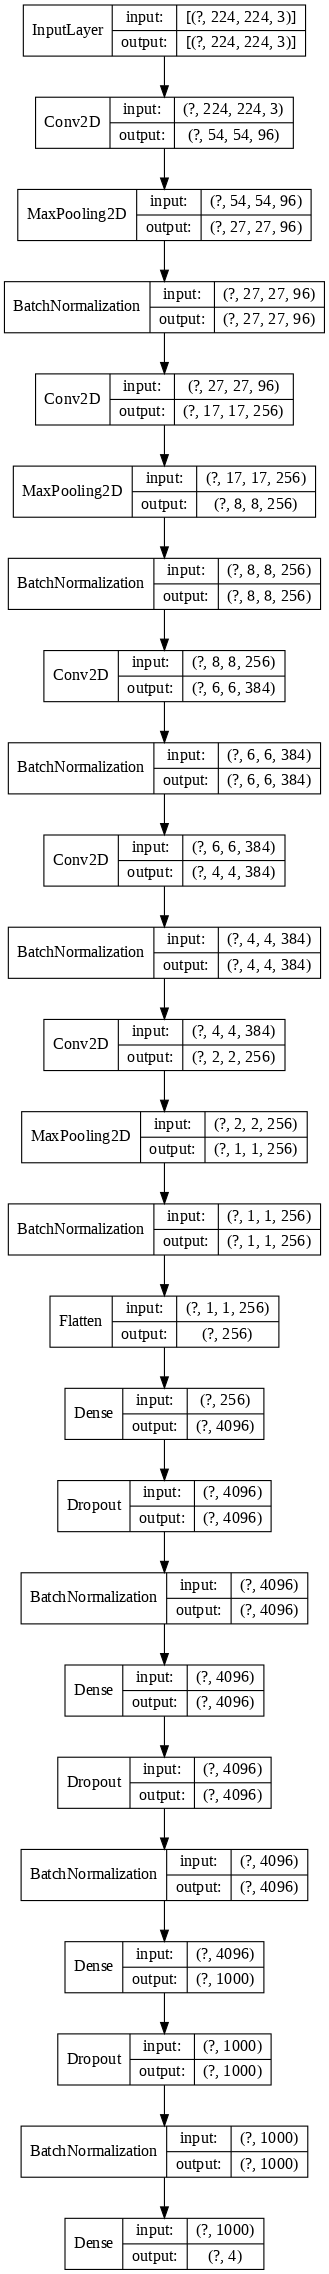

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, AveragePooling2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import  plot_model

def define_model_alexnet():
  classifier = Sequential()
  classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Step 1
  classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
  classifier.add(BatchNormalization())

# Convolution Step 2
  classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
  classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
  classifier.add(BatchNormalization())

# Convolution Step 3
  classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
  classifier.add(BatchNormalization())

# Convolution Step 4
  classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
  classifier.add(BatchNormalization())

# Convolution Step 5
  classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
  classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
  classifier.add(BatchNormalization())

# Flattening Step
  classifier.add(Flatten())

# Full Connection Step
  classifier.add(Dense(units = 4096, activation = 'relu'))
  classifier.add(Dropout(0.4))
  classifier.add(BatchNormalization())
  classifier.add(Dense(units = 4096, activation = 'relu'))
  classifier.add(Dropout(0.4))
  classifier.add(BatchNormalization())
  classifier.add(Dense(units = 1000, activation = 'relu'))
  classifier.add(Dropout(0.2))
  classifier.add(BatchNormalization())
  classifier.add(Dense(units = 4, activation = 'softmax'))



  # opt = Adam(lr=0.0003)  # disini digunakan optimasi adam dengan ukuran 3 x 10^(-4)
  opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005)
  classifier.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #digunakan loss nya adalah categorical crossentropy dikarenakan ingin melakukan klasifikasi 3 kelas
  return classifier

if "classifier" in globals():
  del classifier
  gc.collect()

classifier = define_model_alexnet()
classifier.summary()
plot_model(classifier, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80 )

In [ ]:
%%time

import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

def evaluate_model(dataX, dataY, n_folds=2):
  epochs = 100
  batch_size = 32

  scores, histories = list(), list()
  kfold = KFold(n_folds, shuffle=True, random_state=1)


  i = 0

  for train_ix, val_ix in kfold.split(dataX):
    i = i + 1
    model = define_model_alexnet()

    trainX, trainY, valX, valY = dataX[train_ix], dataY[train_ix], dataX[val_ix], dataY[val_ix]
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data = (valX, valY), verbose=1)

    loss, acc = model.evaluate(valX, valY, verbose=0)
    print('\nAkurasi Fold ke-' + str(i) + ' = %.3f' % (acc * 100.0))
    print('Loss Fold ke-' + str(i) + ' = %.3f' % (loss) + '\n')
    scores.append(acc)
    histories.append(history)

    model.save("/content/drive/MyDrive/TempModel/Alexnet/model_fold_" + str(i) + ".h5")
    model_csv = pd.DataFrame(history.history)
    csv_file = "/content/drive/MyDrive/TempModel/Alexnet/model_fold_" + str(i) + ".csv"
    with open(csv_file, mode="w") as f:
      model_csv.to_csv(f)

    del trainX
    del trainY
    del valX
    del valY
    del model
    gc.collect

  return scores, histories

scores, histories = evaluate_model(X_train_norm, y_train_encode)

Epoch 1/100
4/4 [==============================] - 12s 3s/step - loss: 1.6703 - accuracy: 0.3204 - val_loss: 1.3741 - val_accuracy: 0.3592
Epoch 2/100
4/4 [==============================] - 11s 3s/step - loss: 1.7864 - accuracy: 0.2913 - val_loss: 1.5412 - val_accuracy: 0.4563
Epoch 3/100
4/4 [==============================] - 11s 3s/step - loss: 1.1555 - accuracy: 0.5728 - val_loss: 4.4887 - val_accuracy: 0.2524
Epoch 4/100
4/4 [==============================] - 11s 3s/step - loss: 0.9522 - accuracy: 0.6019 - val_loss: 12.7729 - val_accuracy: 0.2524
Epoch 5/100
4/4 [==============================] - 11s 3s/step - loss: 0.9479 - accuracy: 0.6699 - val_loss: 21.7255 - val_accuracy: 0.2524
Epoch 6/100
4/4 [==============================] - 12s 3s/step - loss: 0.7970 - accuracy: 0.7087 - val_loss: 24.9901 - val_accuracy: 0.2524
Epoch 7/100
4/4 [==============================] - 12s 3s/step - loss: 0.5940 - accuracy: 0.7767 - val_loss: 24.9358 - val_accuracy: 0.2524
Epoch 8/100
4/4 [======

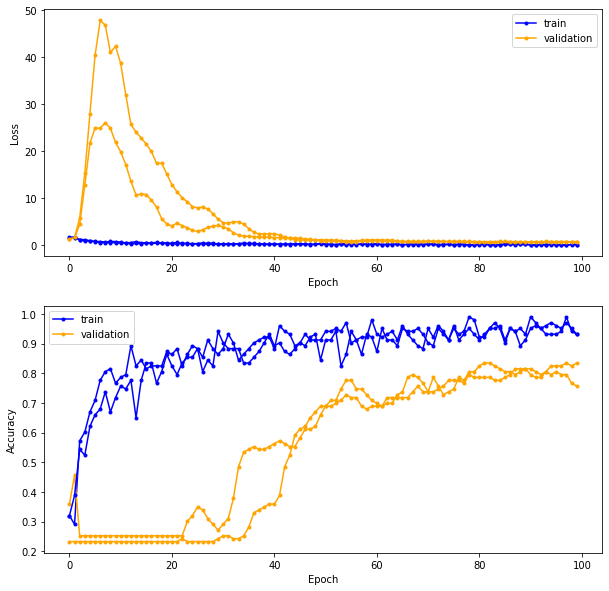

In [ ]:

import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_combine(histories):
    plt.figure(figsize=(10,10))

    for i in range(len(histories)):
        # plot loss
        plt.subplot(211) # 2 baris, 1 kolom, index ke-1
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # plot accuracy
        plt.subplot(212) # 2 baris, 1 kolom, index ke-2
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='bottom right')
    plt.show()

summarize_diagnostics_combine(histories)

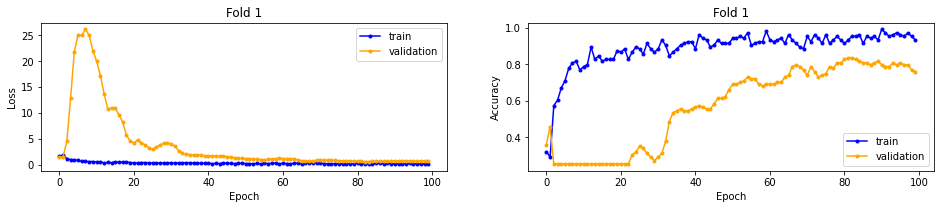

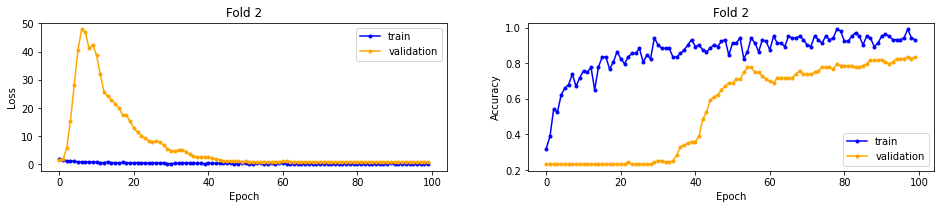

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories):
    for i in range(len(histories)):
        plt.figure(figsize=(16,6))

        # plot loss
        plt.subplot(221) # 2 baris, 2 kolom, index ke-1
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # plot accuracy
        plt.subplot(222) # 2 baris, 2 kolom, index ke-2
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='bottom right')
        plt.show()

summarize_diagnostics_single(histories)

Accuracy: mean=79.612 std=3.883, n=2


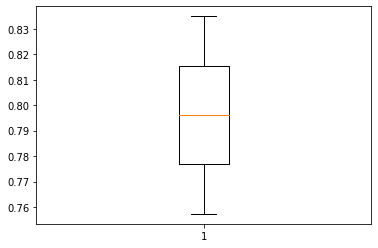

In [ ]:
from numpy import mean
from numpy import std

def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

# summarize estimated performance
summarize_performance(scores)

In [ ]:
import keras
# Bersihkan model sebelumnya (RAM cleaner)
if "classifier" in globals():
  del classifier
  gc.collect()

# Load model
# from keras.models import load_model
import tensorflow as tf
# Masukkan path model yang dipilih
# model = load_model('/content/drive/MyDrive/TempModel/model_fold_1.h5')
model = tf.keras.models.load_model('/content/drive/MyDrive/TempModel/Alexnet/model_fold_2.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 6, 6, 384)        

In [ ]:
from sklearn.preprocessing import LabelBinarizer
if "encoder" in globals():
  del encoder
  del y_train_encode_new
  del y_test_encode_new
  del y_val_encode_new
  # del pred
  del prediksi
  del pred_label
  del true_label
  gc.collect

encoder = LabelBinarizer()
y_train_encode_new = encoder.fit_transform(y_train)
y_test_encode_new = encoder.fit_transform(y_test)
y_val_encode_new = encoder.fit_transform(y_val)


pred = model.predict(X_test_norm.astype('float32'), verbose = 0)
prediksi = np.argmax(pred, axis=-1)


pred_label  = model.predict_classes(X_test_norm, batch_size=32, verbose=0)  # label hasil prediksi
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)

Label Prediksi   : [0 0 3 0 0 0 0 0 0 0 3 0 2 0 3 1 0 0 0 1 0 3 1 0 0 3 2 0 3 0 2 3 3 0 3 0 3
 3 3 3 3 3 2 3 3 1 2 3 3 2 0 0 1 1 3 1 3 3 1 1 0 1 3 1 3 0 2 2 2 2 3 3 3 3
 2 3 3 3 3 2 2 2 3 3 0 2 2 2 2 2 3 2 2 2 0 2 0 2 0 2 3 0 3 3 3 3 3 3 3 0 3
 0 3 3 3 2 0 0 3 3 3 3 0 0 0 0 3 0 3 3]
Label Sebenarya  : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3] 

5/5 [==============================] - 3s 546ms/step - loss: 1.5843 - accuracy: 0.5154


Accuracy : 51.538%
Loss     : 1.584

Classification Report :

              precision    recall  f1-score   support

    COVID-19       0.54      0.57      0.55        37
   PNEUMONIA       0.73      0.29      0.41        28
TUBERCULOSIS       0.73      0.54      0.62        35
      NORMAL       0.35      0.63      0.45        30

    accuracy                           0.52       130
   macro avg       0.59      0.51      0.51       130
weighted avg       0.59      0.52      0.52       130



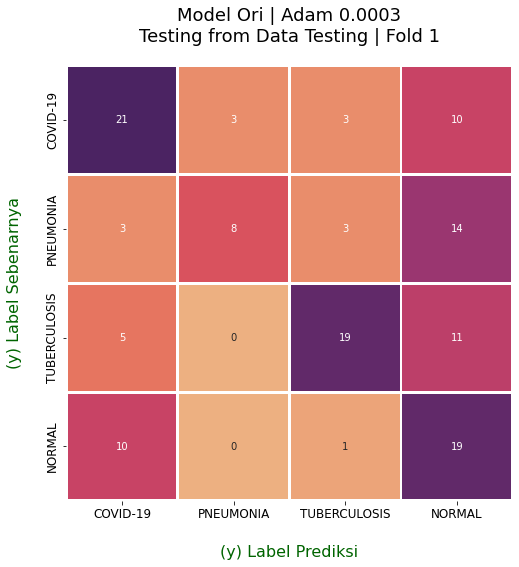

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = categories
# target_names = ['COVID-19', 'PNEUMONIA', 'TUBERCULOSIS', 'NORMAL']
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="flare", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)


ax.set_title('Model Ori | Adam 0.0003\nTesting from Data Testing | Fold 1', fontsize=18, pad=24)  # ⚠️ SESUAIKAN ⚠️ fontsize=14, pad=24)  # ⚠️ SESUAIKAN ⚠️
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Label Prediksi", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Label Sebenarnya", fontsize=16, color="darkgreen", labelpad=24)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelBinarizer
if "encoder" in globals():
  del encoder
  del y_train_encode_new
  del y_test_encode_new
  del y_val_encode_new
  # del pred
  del prediksi
  del pred_label
  del true_label
  gc.collect

encoder = LabelBinarizer()
y_train_encode_new = encoder.fit_transform(y_train)
y_test_encode_new = encoder.fit_transform(y_test)
y_val_encode_new = encoder.fit_transform(y_val)


pred = model.predict(X_val_norm.astype('float32'), verbose = 0)
prediksi = np.argmax(pred, axis=-1)


pred_label  = model.predict_classes(X_val_norm, batch_size=32, verbose=0)  # label hasil prediksi
true_label  = np.argmax(y_val_encode_new, axis=-1)                         # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")

Label Prediksi   : [0 2 0 0 3 1 3 0 0 0 3 3 3 1 1 3 1 3 1 3 2 3 2 2 0 3 3 3 3 3 3 3 0 3 1 3 3
 3 3 3]
Label Sebenarya  : [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3] 



Accuracy : 51.538%
Loss     : 1.584

Classification Report :

              precision    recall  f1-score   support

    COVID-19       0.75      0.60      0.67        10
   PNEUMONIA       0.67      0.40      0.50        10
TUBERCULOSIS       0.75      0.30      0.43        10
      NORMAL       0.36      0.80      0.50        10

    accuracy                           0.53        40
   macro avg       0.63      0.53      0.52        40
weighted avg       0.63      0.53      0.52        40



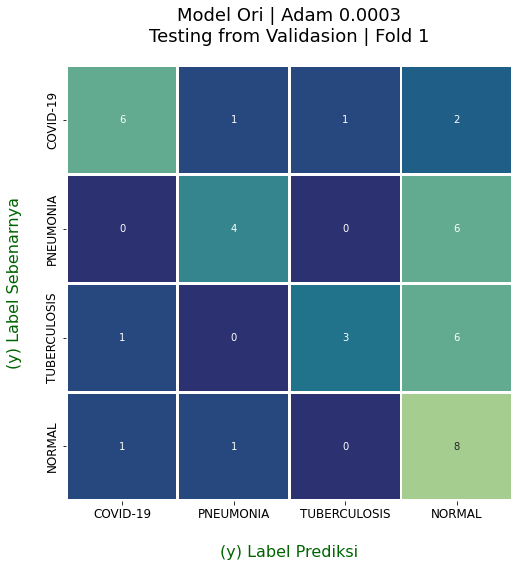

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = categories
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)


ax.set_title('Model Ori | Adam 0.0003\nTesting from Validasion | Fold 1', fontsize=18, pad=24)  # ⚠️ SESUAIKAN ⚠️ fontsize=14, pad=24)  # ⚠️ SESUAIKAN ⚠️
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Label Prediksi", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Label Sebenarnya", fontsize=16, color="darkgreen", labelpad=24)
plt.show()